## Digital Recognition (MNIST)

Alice, Bob, and Daniel are friends learning machine learning together. After watching a few lectures, they are very proud of having learned many useful tools, including linear and logistic regression, non-linear features, regularization, and kernel tricks. To see how these methods can be used to solve a real life problem, they decide to get their hands dirty with the famous digit recognition problem using the MNIST (Mixed National Institute of Standards and Technology) database.

Hearing that you are an excellent student in the MITx machine learning class with solid understanding of the material and great coding ability in Python, they decide to invite you to their team and help them with implementing these different algorithms.

The MNIST database contains binary images of handwritten digits commonly used to train image processing systems. The digits were collected from among Census Bureau employees and high school students. The database contains 60,000 training digits and 10,000 testing digits, all of which have been size-normalized and centered in a fixed-size image of 28 × 28 pixels. Many methods have been tested with this dataset and in this project, you will get a chance to experiment with the task of classifying these images into the correct digit using some of the methods you have learned so far.

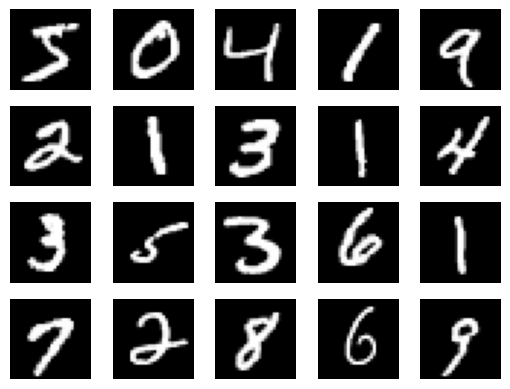

In [1]:
import utils as U
# Load MNIST data:
train_x, train_y, test_x, test_y = U.get_MNIST_data('Datasets/mnist.pkl.gz')
# Plot the first 20 images of the training set.
U.plot_images(train_x[0:20, :])

After seeing the problem, your classmate Alice immediately argues that we can apply a linear regression model, as the labels are numbers from 0-9, very similar to the example we learned from Unit 1. Though being a little doubtful, you decide to have a try and start simple by using the raw pixel values of each image as features.

Alice wrote a skeleton code run_linear_regression_on_MNIST in main.py, but she needs your help to complete the code and make the model work.

## Closed Form Solution of Linear Regression

The Closed Form Solution of Linear Regression, particularly when referring to **linear regression with L2 regularization** (also known as Ridge Regression), is a mathematical approach to find the optimal parameters (weights) of the model without needing iterative optimization methods like Gradient Descent. This solution directly computes the weights that minimize the cost function of the linear regression model.

### Mathematical Expression
Given a dataset with $n$ samples, each having $d$ features. The Closed Form Solution for $\theta$ for Ridge Regression is given by:

$$\theta = (X^TX + \lambda I)^{-1}X^TY$$

where:
- $X$ is the feature matrix,
- $Y$ is the vector of labels,
- $\lambda$ is the regularization parameter,
- $X^T$ is the transpose of $X$,
- $I$ is the identity matrix of size $(d+1) \times (d+1)$ (to exclude the bias term from regularization, the first element of $I$, $I_{00}$, is set to 0),
- $(X^TX + \lambda I)^{-1}$ is the inverse of the matrix $(X^TX + \lambda I)$.

### Python Implementation

In [21]:
import utils as U
import numpy as np
import test_utils as T

# Jupiter notebook cache the imported modules, so we need to reload the module to get the latest changes
import importlib
importlib.reload(T)

# Create a link to the test_utils.py file
# ln -s /Users/n03an/Documents/projects/AI/edx/MIT-MachineLearning-MicroMasters/test/utils.py test_utils.py 

def run_linear_regression_on_MNIST(lambda_factor=1, dataset='Datasets/mnist.pkl.gz'):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    # Load MNIST data
    train_x, train_y, test_x, test_y = U.get_MNIST_data(dataset)
    # Add bias dimension (adds a column of ones to the training features)
    # This bias term allows the linear regression model to learn an intercept term.
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    # Add bias dimension to test data
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    # Compute parameter / weights using closed form solution using training data
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    # Compute test error using test data
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error

def closed_form(X, Y, lambda_factor):
    """
    Computes the closed form solution of linear regression with L2 regularization

    Args:
        X - (n, d + 1) NumPy array (n datapoints each with d features plus the bias feature in the first dimension)
        Y - (n, ) NumPy array containing the labels (a number from 0-9) for each
            data point
        lambda_factor - the regularization constant (scalar)
    Returns:
        theta - (d + 1, ) NumPy array containing the weights of linear regression. Note that theta[0]
        represents the y-axis intercept of the model and therefore X[0] = 1
    """

    I = np.identity(X.shape[1])
    #  np.dot(X.T, X) == X.T @ X
    theta = np.linalg.inv((X.T @ X) + (lambda_factor * I)) @ X.T @ Y
    return theta

def compute_test_error_linear(test_x, Y, theta):
    # Look at individual pridictions and compare to actual
    # (nsamples, nfeatures) = test_x.shape
    # for i in range(nsamples):
    #     prediction = np.round(np.dot(test_x[i], theta))
    #     print(f"Prediction: {prediction}, Actual: {Y[i]}")
    test_y_predict = np.round(np.dot(test_x, theta))
    test_y_predict[test_y_predict < 0] = 0
    test_y_predict[test_y_predict > 9] = 9
    return 1 - np.mean(test_y_predict == Y)

# Test
def check_closed_form():
    ex_name = "Closed form"
    X = np.arange(1, 16).reshape(3, 5)
    Y = np.arange(1, 4)
    lambda_factor = 0.5
    exp_res = np.array([-0.03411225,  0.00320187,  0.04051599,  0.07783012,  0.11514424])
    if T.check_array(
            ex_name, closed_form,
            exp_res, X, Y, lambda_factor):
        return

    T.log(T.green("PASS"), ex_name, "")

check_closed_form()

# Run linear regression on MNIST dataset with varying regularization constants
print('Linear Regression test_error with regularization constant as 1  =', run_linear_regression_on_MNIST(lambda_factor=1))
print('Linear Regression test_error with regularization constant as 0.1 =', run_linear_regression_on_MNIST(lambda_factor=0.1))
print('Linear Regression test_error with regularization constant as 0.01 =', run_linear_regression_on_MNIST(lambda_factor=0.01))

PASS Closed form 
Linear Regression test_error with regularization constant as 1  = 0.7697
Linear Regression test_error with regularization constant as 0.1 = 0.7698
Linear Regression test_error with regularization constant as 0.01 = 0.7702


```python
def compute_test_error_linear(test_x, Y, theta):
    test_y_predict = np.round(np.dot(test_x, theta))
    test_y_predict[test_y_predict < 0] = 0
    test_y_predict[test_y_predict > 9] = 9
    return 1 - np.mean(test_y_predict == Y)
```


The function `compute_test_error_linear` in the provided code snippet calculates the test error for linear regression. Here's a step-by-step explanation of how it works:

1) **Predict Test Labels**: It uses the linear regression model's weights (`theta`) to predict the labels for the test dataset. This is done by multiplying the test feature matrix (`test_x`) with the weight vector (`theta`). The result is a vector of predicted continuous values.

2) **Round Predictions**: The continuous predictions are rounded to the nearest integer using np.round, as the MNIST labels are integers from 0 to 9. This step converts the continuous predictions into discrete class labels.

3) **Clip Predictions**: The predictions are then clipped to the range [0, 9] using `test_y_predict[test_y_predict < 0] = 0` and `test_y_predict[test_y_predict > 9] = 9`. This ensures that after rounding, any prediction outside the valid range of labels is corrected to the nearest valid label.

4) **Calculate Test Error**: Finally, the test error is calculated by comparing the predicted labels (`test_y_predict`) with the actual labels (`Y`). The comparison `test_y_predict == Y` produces a boolean array, where True indicates a correct prediction and False indicates an incorrect prediction. The mean of this boolean array gives the accuracy (the proportion of correct predictions). Subtracting this accuracy from 1 gives the error rate, i.e., the proportion of incorrect predictions.

The function returns the final test error, which is the proportion of the test dataset that was incorrectly classified by the linear regression model.

### Note
Notice how the error rate is so high irrespective of regularization $\lambda$. The function `compute_test_error_linear` calculates the test error for a linear regression model applied to a classification problem (MNIST digits classification). Linear regression is not the best choice for classification tasks, especially for multi-class problems like MNIST. Hence it does not matter what regularization constant we use, but the choice of the model itself.

## Support Vector Machine

> Bob thinks it is clearly not a regression problem, but a classification problem. He thinks that we can change it into a binary classification and use the support vector machine we learned in Lecture 4 to solve the problem. In order to do so, he suggests that we can build an one vs. rest model for every digit. For example, classifying the digits into two classes: 0 and not 0.

> Bob wrote a function run_svm_one_vs_rest_on_MNIST where he changed the labels of digits 1-9 to 1 and keeps the label 0 for digit 0. He also found that sklearn package contains an SVM model that you can use directly. He gave you the link to this model and hopes you can tell him how to use that.


#### Recap on Support Vector Machines on Linearly Separable Data
Support Vector Machine or SVM is a supervised machine learning algorithm which is generally used for classification tasks. The idea was presented by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963 assuming that the data points are linearly separable. Later, Vladimir N. Vapnik extended this initial idea and introduced something called as “kernel trick” to enable non-linear classifications too.

A **linear SVM classifier** assumes that the vectors are linearly separable, meaning we can draw a linear decision boundary to represent our classifier. In an n-dimensional space, this boundary is called a **hyperplane**. In 2-D, it is a line; in 3-D, a plane; and in higher dimensions, a hyperplane. The key idea is that the decision boundary is linear and divides the space so that all examples of class C1 lie on one side and all examples of class C2 lie on the other. Our goal is to find a hyperplane that separates positive training examples (C1) from negative ones (C2). We aim to learn the equation of this hyperplane, which represents our hypothesis. In machine learning, we hypothesize about the function linking input to output and proceed accordingly.

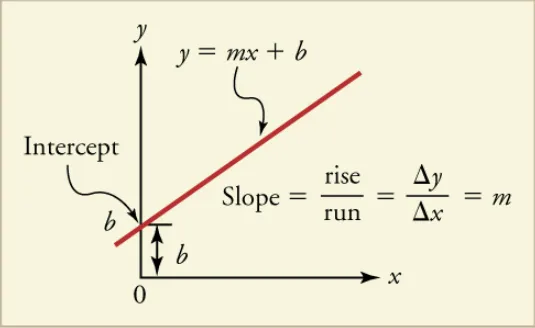

Here is an example of a 2-D space where the hyperplane is a line. `m` is the slope of the line and `b` is a constant. The slope (coefficient of x or parameters or weights) generally gives an idea of the orientation of the line with respect to x-axis and b represents the bias. Bias is a constant value that represents nothing but the position of the line from origin.

##### The hyperplane is the classifier
and can be represented as $y = mx + b$ or in a more standard notation as

$$
w.X + b = 0
$$

The above equation is the decision boundary (Hyperplane) where the function $f(x)$ equals zero. This is the actual hyperplane that seperates the two classes. The decision function $f(x)$ can be represented as and is used to classify points and determine on which side of hyperplane a point lies

$$
f(x) = w^T.X + b
$$

where 
- $w$ is an n-dimensional column vector representing weights
- $X$ is also an n-dimensional column vector representing features
- $w^T.X$ is the dot product of weight vector and feature vector. The trasnpose will make the weight column vector into row vector to product of scalar value for dot product.

---
e.g. a line $x - 2y + 3 = 0$ as a hyperplan can be represented with $W = [1, -2]$, $X = [x, y]$ and bias $b = 3$. Similarly for a plan in 3d space say 2x + 3y + 4z + 3 = 0, the $W = [2, 3, 4]$, $X = [x, y, z]$ and bias, $b= 3$. The vector $[2, 3, 4]$ will always be normal to the plane $2x + 3y + 4z + 3 = 0$

---







Given a dataset of $n$ points of the form $(\mathbf{x}_i, y_i)$ where $\mathbf{x}_i$ is a feature vector and $y_i \in \{-1, 1\}$ is the class label, the SVM finds the hyperplane that separates the classes with the maximum margin. This hyperplane can be described by the equation:

$$
\mathbf{w} \cdot \mathbf{x} - b = 0
$$

Where:
- $\mathbf{w}$ is the weight vector perpendicular to the hyperplane.
- $b$ is the bias term.

The objective is to minimize $\|\mathbf{w}\|$ subject to $y_i(\mathbf{w} \cdot \mathbf{x}_i - b) \geq 1$ for all $i$. This constraint ensures that all data points are on the correct side of the margin.


In [22]:
import utils as U

def run_svm_one_vs_rest_on_MNIST(dataset='Datasets/mnist.pkl.gz'):
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = U.get_MNIST_data(dataset)
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error

def compute_test_error_svm(test_y, pred_test_y):
    return 1 - np.mean(pred_test_y == test_y)

def one_vs_rest_svm(train_x, train_y, test_x):
    """
    Trains a linear SVM for binary classifciation

    Args:
        train_x - (n, d) NumPy array (n datapoints each with d features)
        train_y - (n, ) NumPy array containing the labels (0 or 1) for each training data point
        test_x - (m, d) NumPy array (m datapoints each with d features)
    Returns:
        pred_test_y - (m,) NumPy array containing the labels (0 or 1) for each test data point
    """
    raise NotImplementedError


print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())

NotImplementedError: 

Support Vector Machine (SVM) is a supervised machine learning algorithm used for binary classification tasks. The goal of SVM is to find the hyperplane that best separates the data points into two classes. The hyperplane is chosen to maximize the margin between the closest points of the two classes, which are known as support vectors.

### Mathematical Expression

Given a dataset of $n$ points of the form $(\mathbf{x}_i, y_i)$ where $\mathbf{x}_i$ is a feature vector and $y_i \in \{-1, 1\}$ is the class label, the SVM finds the hyperplane that separates the classes with the maximum margin. This hyperplane can be described by the equation:

$$
\mathbf{w} \cdot \mathbf{x} - b = 0
$$

Where:
- $\mathbf{w}$ is the weight vector perpendicular to the hyperplane.
- $b$ is the bias term.

The objective is to minimize $\|\mathbf{w}\|$ subject to $y_i(\mathbf{w} \cdot \mathbf{x}_i - b) \geq 1$ for all $i$. This constraint ensures that all data points are on the correct side of the margin.

### Python Implementation

In Python, you can use libraries like `scikit-learn` to implement SVM for binary classification. Here's a simplified example using `scikit-learn`:



In [ ]:
from sklearn import svm
from sklearn.datasets import make_classification
import numpy as np

# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)

# Train the SVM model
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Predict using the trained model
pred_y = model.predict(X)

# Compute accuracy
accuracy = np.mean(pred_y == y)
print(f'Accuracy: {accuracy}')



In this example:
- `svm.SVC(kernel='linear', C=1.0)` creates an SVM classifier with a linear kernel. The `C` parameter controls the trade-off between a smooth decision boundary and classifying training points correctly.
- `model.fit(X, y)` trains the SVM model on the dataset.
- `model.predict(X)` makes predictions on the dataset.
- The accuracy is computed as the mean of correct predictions.

This is a basic introduction and implementation. Real-world scenarios might require tuning parameters and preprocessing data for optimal performance.